In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jsonlines
from datetime import datetime, date

plt.style.use('ggplot')
%matplotlib inline

In [2]:
ALLEN_AI_RES_PATH = "../res/allenai/metadata.csv"
ELSEVIER_RES_PATH = "../res/elsevier/meta.jsonl"

In [3]:
df_allen = pd.read_csv(ALLEN_AI_RES_PATH)

# we just consider elsevier entries
df_allen = df_allen[df_allen['source_x']=='Elsevier']

print(len(df_allen.index))
df_allen.head(5)

19471


,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
0,NaN,Elsevier,Intrauterine virus infections and congenital h...,10.1016/0002-8703(72)90077-4,NaN,4361535.0,els-covid,Abstract The etiologic basis for the vast majo...,1972-12-31,"Overall, James C.",American Heart Journal,NaN,NaN,False,custom_license
1,NaN,Elsevier,Coronaviruses in Balkan nephritis,10.1016/0002-8703(80)90355-5,NaN,6243850.0,els-covid,NaN,1980-03-31,"Georgescu, Leonida; Diosi, Peter; Buţiu, Ioan;...",American Heart Journal,NaN,NaN,False,custom_license
2,NaN,Elsevier,Cigarette smoking and coronary heart disease: ...,10.1016/0002-8703(80)90356-7,NaN,7355701.0,els-covid,NaN,1980-03-31,"Friedman, Gary D",American Heart Journal,NaN,NaN,False,custom_license
3,aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical ...,10.1016/0002-9343(73)90176-9,NaN,4579077.0,els-covid,"Abstract Middle-aged female identical twins, o...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann,...",The American Journal of Medicine,NaN,NaN,True,custom_license
4,NaN,Elsevier,Epidemiology of community-acquired respiratory...,10.1016/0002-9343(85)90361-4,NaN,4014285.0,els-covid,Abstract Upper respiratory tract infections ar...,1985-06-28,"Garibaldi, Richard A.",The American Journal of Medicine,NaN,NaN,False,custom_license


In [4]:
df_elsevier = pd.read_json(ELSEVIER_RES_PATH, lines=True)

print(len(df_elsevier.index))
df_elsevier.head(5)

20045


,coredata.articleNumber,coredata.dc:creator,coredata.dc:description,coredata.dc:format,coredata.dc:identifier,coredata.dc:title,coredata.dcterms:isPartOf,coredata.dcterms:subject,coredata.eid,coredata.link,...,originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-access-inherited-from.@wintype,originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-article-status.$,originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-article-status.@is-open-access,originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-article-status.@is-open-archive,originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-sponsor.xocs:oa-sponsor-name,originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-sponsor.xocs:oa-sponsor-type,originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-user-license,pubmed-id,scopus-eid,scopus-id
0,None,"[{'@_fa': 'true', '$': 'Overall, James C.'}]",\n Abstract\n \n ...,application/json,doi:10.1016/0002-8703(72)90077-4,Intrauterine virus infections and congenital h...,None,None,1-s2.0-0002870372900774,[{'@href': 'https://api.elsevier.com/content/a...,...,None,None,0,0,None,None,None,4361535.0,2-s2.0-0015469473,15469473.0
1,None,"[{'@_fa': 'true', '$': 'Georgescu, Leonida'}, ...",None,application/json,doi:10.1016/0002-8703(80)90355-5,Coronaviruses in Balkan nephritis,None,None,1-s2.0-0002870380903555,[{'@href': 'https://api.elsevier.com/content/a...,...,None,None,0,0,None,None,None,6243850.0,2-s2.0-0018939420,18939420.0
2,None,"[{'@_fa': 'true', '$': 'Friedman, Gary D'}]",None,application/json,doi:10.1016/0002-8703(80)90356-7,Cigarette smoking and coronary heart disease: ...,None,None,1-s2.0-0002870380903567,[{'@href': 'https://api.elsevier.com/content/a...,...,None,None,0,0,None,None,None,7355701.0,2-s2.0-0019308150,19308150.0
3,None,"[{'@_fa': 'true', '$': 'Brunner, Carolyn M.'},...",\n Abstract\n \n ...,application/json,doi:10.1016/0002-9343(73)90176-9,Clinical and immunologic studies in identical ...,None,None,1-s2.0-0002934373901769,[{'@href': 'https://api.elsevier.com/content/a...,...,None,None,0,0,None,None,None,4579077.0,2-s2.0-0015901503,15901503.0
4,None,"[{'@_fa': 'true', '$': 'Garibaldi, Richard A.'}]",\n Abstract\n \n ...,application/json,doi:10.1016/0002-9343(85)90361-4,Epidemiology of community-acquired respiratory...,None,None,1-s2.0-0002934385903614,[{'@href': 'https://api.elsevier.com/content/a...,...,None,None,0,0,None,None,None,4014285.0,2-s2.0-0021833179,21833179.0


In [5]:
df_elsevier.columns.tolist()

['coredata.articleNumber',
 'coredata.dc:creator',
 'coredata.dc:description',
 'coredata.dc:format',
 'coredata.dc:identifier',
 'coredata.dc:title',
 'coredata.dcterms:isPartOf',
 'coredata.dcterms:subject',
 'coredata.eid',
 'coredata.link',
 'coredata.openArchiveArticle',
 'coredata.openaccess',
 'coredata.openaccessArticle',
 'coredata.openaccessSponsorName',
 'coredata.openaccessSponsorType',
 'coredata.openaccessType',
 'coredata.openaccessUserLicense',
 'coredata.pii',
 'coredata.prism:aggregationType',
 'coredata.prism:copyright',
 'coredata.prism:coverDate',
 'coredata.prism:coverDisplayDate',
 'coredata.prism:doi',
 'coredata.prism:edition',
 'coredata.prism:endingPage',
 'coredata.prism:isbn',
 'coredata.prism:issn',
 'coredata.prism:issueIdentifier',
 'coredata.prism:issueName',
 'coredata.prism:number',
 'coredata.prism:pageRange',
 'coredata.prism:publicationName',
 'coredata.prism:publisher',
 'coredata.prism:startingPage',
 'coredata.prism:url',
 'coredata.prism:volume

### Duplicate values

In [6]:
print('DOI')
print(df_allen.fillna(-1).groupby('doi').filter(lambda x: len(x) > 1).doi.value_counts())
print('----')
print(df_elsevier.fillna(-1).groupby('coredata.prism:doi').filter(lambda x: len(x) > 1)['coredata.prism:doi'].value_counts())

DOI
-1    77
Name: doi, dtype: int64
----
-1    15
Name: coredata.prism:doi, dtype: int64


In [7]:
print('Title + Authors (identity)')
print(len(df_allen[df_allen.duplicated(['title', 'authors'])].index), "potential duplicates within allen")
df_allen[df_allen.duplicated(['title', 'authors'], keep=False)].sort_values('title').head(8)

Title + Authors (identity)
1414 potential duplicates within allen


,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
4560,29f27a19ddf105e364f01948dc152bbd63398755,Elsevier,2 Spezielle Arzneimitteltherapie in der Schwan...,10.1016/B978-3-437-21203-1.10002-0,NaN,NaN,els-covid,NaN,2012-12-31,NaN,Arzneimittel in Schwangerschaft und Stillzeit,NaN,NaN,True,custom_license
4563,b41f38c25e36fa3b0e0d6bb631b86ef0876a43b8,Elsevier,2 Spezielle Arzneimitteltherapie in der Schwan...,10.1016/B978-343721332-8.50004-1,NaN,NaN,els-covid,NaN,2006-12-31,NaN,Arzneiverordnung in Schwangerschaft und Stillzeit,NaN,NaN,True,custom_license
3435,51db279a1509cf5343f17db46f20b80ae297213c,Elsevier,201 Classification of Human Viruses,10.1016/B978-0-323-40181-4.00201-2,NaN,NaN,els-covid,NaN,2018-12-31,"Siegel, Robert David",Principles and Practice of Pediatric Infectiou...,NaN,NaN,True,custom_license
4298,3c1620782ef1b8cb97a256a0b2094e05cd3b07f5,Elsevier,201 Classification of Human Viruses,10.1016/B978-1-4377-2702-9.00203-8,NaN,NaN,els-covid,NaN,2012-12-31,"Siegel, Robert David",Principles and Practice of Pediatric Infectiou...,NaN,NaN,True,custom_license
4299,a32e0fc181693714c75d10caf751df4094c65766,Elsevier,222 Human Coronaviruses,10.1016/B978-1-4377-2702-9.00224-5,NaN,NaN,els-covid,NaN,2012-12-31,"Poutanen, Susan M.",Principles and Practice of Pediatric Infectiou...,NaN,NaN,True,custom_license
3436,f2beb979470cf06057fa5ea1dec9d3e5f1110601,Elsevier,222 Human Coronaviruses,10.1016/B978-0-323-40181-4.00222-X,NaN,NaN,els-covid,NaN,2018-12-31,"Poutanen, Susan M.",Principles and Practice of Pediatric Infectiou...,NaN,NaN,True,custom_license
4342,2331a50a7a96d6e703d4c60d44b719716705b5d1,Elsevier,23 Pneumonia,10.1016/B978-1-4557-2532-8.00023-2,NaN,NaN,els-covid,NaN,2014-12-31,"Weinberger, Steven E.; Cockrill, Barbara A.; M...",Principles of Pulmonary Medicine,NaN,NaN,True,custom_license
3485,0e4dd2e8a1b942a33f564855d6fd8444d398c442,Elsevier,23 Pneumonia,10.1016/B978-0-323-52371-4.00026-X,NaN,NaN,els-covid,"Abstract By nearly any criteria, pneumonia (in...",2019-12-31,"Weinberger, Steven E.; Cockrill, Barbara A.; M...",Principles of Pulmonary Medicine,NaN,NaN,True,custom_license


In [8]:
print('Title + Authors (identity)')
df_elsevier['creator_str'] = df_elsevier['coredata.dc:creator'].apply(lambda x: ';'.join([y['$'] for y in x]) if x else '')
print(len(df_elsevier[df_elsevier.duplicated(['coredata.dc:title', 'creator_str'])].index), "potential duplicates within elsevier")
df_elsevier[df_elsevier.duplicated(['coredata.dc:title', 'creator_str'], keep=False)].sort_values('coredata.dc:title').head(8)

Title + Authors (identity)
1353 potential duplicates within elsevier


,coredata.articleNumber,coredata.dc:creator,coredata.dc:description,coredata.dc:format,coredata.dc:identifier,coredata.dc:title,coredata.dcterms:isPartOf,coredata.dcterms:subject,coredata.eid,coredata.link,...,originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-article-status.$,originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-article-status.@is-open-access,originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-article-status.@is-open-archive,originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-sponsor.xocs:oa-sponsor-name,originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-sponsor.xocs:oa-sponsor-type,originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-user-license,pubmed-id,scopus-eid,scopus-id,creator_str
4571,None,None,None,application/json,doi:10.1016/B978-343721332-8.50004-1,2 Spezielle Arzneimitteltherapie in der Schwan...,urn:isbn:978-3-437-21332-8,None,3-s2.0-B9783437213328500041,[{'@href': 'https://api.elsevier.com/content/a...,...,None,0,0,None,None,None,NaN,None,NaN,
4568,None,None,None,application/json,doi:10.1016/B978-3-437-21203-1.10002-0,2 Spezielle Arzneimitteltherapie in der Schwan...,urn:isbn:978-3-437-21203-1,None,3-s2.0-B9783437212031100020,[{'@href': 'https://api.elsevier.com/content/a...,...,None,0,0,None,None,None,NaN,None,NaN,
3442,None,"[{'@_fa': 'true', '$': 'Siegel, Robert David'}]",None,application/json,doi:10.1016/B978-0-323-40181-4.00201-2,201 Classification of Human Viruses,urn:isbn:978-0-323-40181-4,None,3-s2.0-B9780323401814002012,[{'@href': 'https://api.elsevier.com/content/a...,...,None,0,0,None,None,None,NaN,2-s2.0-85055511812,8.505551e+10,"Siegel, Robert David"
4306,None,"[{'@_fa': 'true', '$': 'Siegel, Robert David'}]",None,application/json,doi:10.1016/B978-1-4377-2702-9.00203-8,201 Classification of Human Viruses,urn:isbn:978-1-4377-2702-9,None,3-s2.0-B9781437727029002038,[{'@href': 'https://api.elsevier.com/content/a...,...,None,0,0,None,None,None,NaN,2-s2.0-84967329251,8.496733e+10,"Siegel, Robert David"
4307,None,"[{'@_fa': 'true', '$': 'Poutanen, Susan M.'}]",None,application/json,doi:10.1016/B978-1-4377-2702-9.00224-5,222 Human Coronaviruses,urn:isbn:978-1-4377-2702-9,None,3-s2.0-B9781437727029002245,[{'@href': 'https://api.elsevier.com/content/a...,...,None,0,0,None,None,None,NaN,2-s2.0-84967189048,8.496719e+10,"Poutanen, Susan M."
3443,None,"[{'@_fa': 'true', '$': 'Poutanen, Susan M.'}]",None,application/json,doi:10.1016/B978-0-323-40181-4.00222-X,222 Human Coronaviruses,urn:isbn:978-0-323-40181-4,None,3-s2.0-B978032340181400222X,[{'@href': 'https://api.elsevier.com/content/a...,...,None,0,0,None,None,None,NaN,2-s2.0-85055492402,8.505549e+10,"Poutanen, Susan M."
4350,None,"[{'@_fa': 'true', '$': 'Weinberger, Steven E.'...",None,application/json,doi:10.1016/B978-1-4557-2532-8.00023-2,23 Pneumonia,urn:isbn:978-1-4557-2532-8,None,3-s2.0-B9781455725328000232,[{'@href': 'https://api.elsevier.com/content/a...,...,None,0,0,None,None,None,NaN,None,NaN,"Weinberger, Steven E.;Cockrill, Barbara A.;Man..."
3492,None,"[{'@_fa': 'true', '$': 'Weinberger, Steven E.'...",\n Abstract\n \n ...,application/json,doi:10.1016/B978-0-323-52371-4.00026-X,23 Pneumonia,urn:isbn:978-0-323-52371-4,"[{'@_fa': 'true', '$': 'Pneumonia'}, {'@_fa': ...",3-s2.0-B978032352371400026X,[{'@href': 'https://api.elsevier.com/content/a...,...,None,0,0,None,None,None,NaN,None,NaN,"Weinberger, Steven E.;Cockrill, Barbara A.;Man..."


In [9]:
print('DOI in Allen, but not in Elsevier:', len(df_allen[~df_allen['doi'].isin(df_elsevier['coredata.prism:doi'])].index))
print('DOI In Elsevier, but not in Allen:', len(df_elsevier[~df_elsevier['coredata.prism:doi'].isin(df_allen['doi'])].index))

DOI in Allen, but not in Elsevier: 77
DOI In Elsevier, but not in Allen: 651


In [10]:
df_elsevier['title_parsed'] = df_elsevier['coredata.dc:title'].apply(lambda x: x.strip() if x else np.nan)
print('Title in Allen, but not in Elsevier:', len(df_allen[~df_allen['title'].isin(df_elsevier['title_parsed'])].index))
print('Title In Elsevier, but not in Allen:', len(df_elsevier[~df_elsevier['title_parsed'].isin(df_allen['title'])].index))

Title in Allen, but not in Elsevier: 476
Title In Elsevier, but not in Allen: 1104


In [11]:
df_not_in_allen = df_elsevier[~df_elsevier['coredata.prism:doi'].isin(df_allen['doi'])]
df_not_in_allen['parsed_date'] = pd.to_datetime(df_not_in_allen['coredata.prism:coverDate'])

E:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


NA 0


parsed_date
2020-12-31    373
2019-12-31     51
2017-12-31     36
2018-12-31     34
2016-12-31     31
2015-12-31     30
2003-12-31     13
2008-12-31     10
2010-12-31     10
2014-12-31     10
Name: coredata.eid, dtype: int64

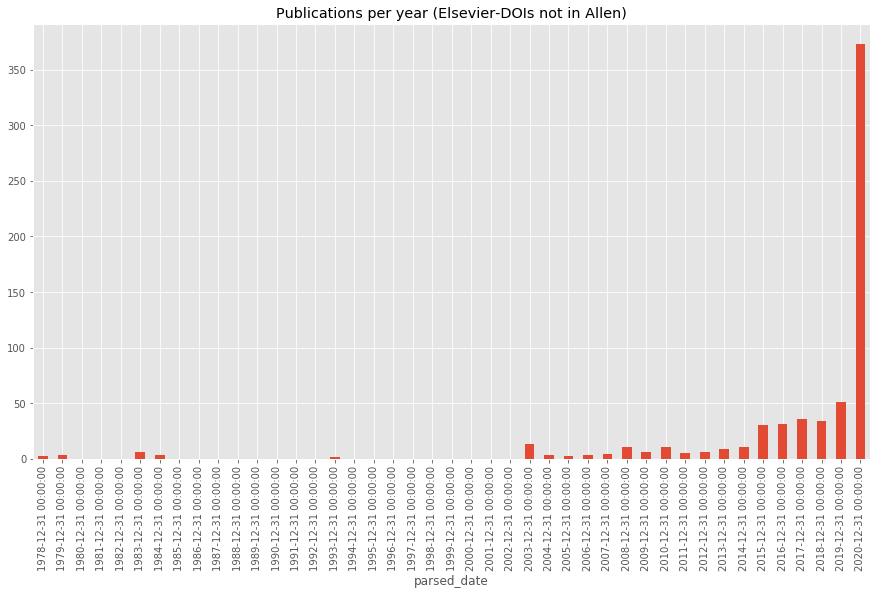

In [12]:
df_not_in_allen.set_index('parsed_date').resample('y').count()['coredata.eid'].plot(kind='bar', figsize=(15,8), title='Publications per year (Elsevier-DOIs not in Allen)')
print('NA', df_not_in_allen['parsed_date'].isna().sum())
df_not_in_allen.set_index('parsed_date').resample('y').count()['coredata.eid'].sort_values(ascending=False).head(10)

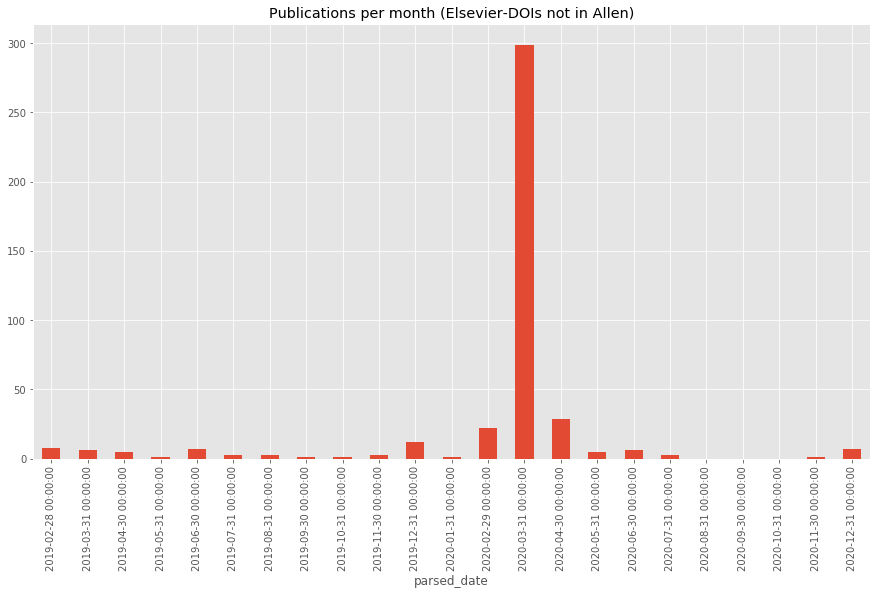

In [13]:
df_not_in_allen[df_not_in_allen['parsed_date'] > pd.Timestamp(2019,1,31)].set_index('parsed_date').resample('m').count()['coredata.eid'].plot(kind='bar', figsize=(15,8), title='Publications per month (Elsevier-DOIs not in Allen)')

In [15]:
new_w = len(df_not_in_allen[df_not_in_allen['parsed_date'] > pd.Timestamp(2020,1,31)].index)
old_w = len(df_not_in_allen[df_not_in_allen['parsed_date'] <= pd.Timestamp(2020,1,31)].index)
print('New:', new_w, '; Old:', old_w)
print('New ratio:', new_w/len(df_not_in_allen.index))

New: 372 ; Old: 279
New ratio: 0.5714285714285714
